In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact

In [2]:
# manual seed for reproducibility
torch.manual_seed(85513)
np.random.seed(9991)

transform = transforms.Compose(
    [transforms.PILToTensor(),
     transforms.ConvertImageDtype(torch.float)
    ])

In [3]:
from SineGratesDataset import pil_to_tensor
transform = pil_to_tensor

# Creating Sinusoidal Grating Dataset

In [4]:
from SineGratesDataset import SineGrates

In [5]:
cat_scheme = 'ii'

In [6]:
rb_params = {
    'a_means':[[30,50],[50,70]],
    'b_means':[[50,30],[70,50]],
    'a_covariances':[[[10,0],[0,150]],[[150,0],[0,10]]],
    'b_covariances':[[[10,0],[0,150]],[[150,0],[0,10]]]
}

ii_params = {
    'a_means':[40,50],
    'b_means':[60,50],
    'a_covariances':[[10,0],[0,280]],
    'b_covariances':[[10,0],[0,280]]
}

if cat_scheme == 'rb':
    dist_params = rb_params
elif cat_scheme == 'ii':
    dist_params = ii_params

In [7]:
trainset = SineGrates(cat_scheme=cat_scheme, dist_params=dist_params, length=1000, transform=transform, randomize_phase=True)
#testset = trainset
testset = SineGrates(cat_scheme=cat_scheme, dist_params=dist_params, length=100, transform=transform, randomize_phase=True)

## Visualize and modify the distribution parameters

The dataset will automatically reflect these manual changes when generating the data.

In [8]:
def modify_dist_params_ii(**kwargs):
    new_params = {
        'a_means':[kwargs['a_means_x'], kwargs['a_means_y']],
        'b_means':[kwargs['b_means_x'], kwargs['b_means_y']],
        'a_covariances':[[kwargs['a_cov_x'],0],[0,kwargs['a_cov_y']]],
        'b_covariances':[[kwargs['b_cov_x'],0],[0,kwargs['b_cov_y']]]
    }
    trainset.set_dist_params(new_params)
    testset.set_dist_params(new_params)
    plt.show(trainset.plot_final())
    plt.show(testset.plot_final())

In [9]:
def modify_dist_params_rb(**kwargs):
    new_params = {
        'a_means':[[kwargs['a_means_1_x'], kwargs['a_means_1_y']],
                   [kwargs['a_means_2_x'], kwargs['a_means_2_y']]],
        'b_means':[[kwargs['b_means_1_x'], kwargs['b_means_1_y']],
                   [kwargs['b_means_2_x'], kwargs['b_means_2_y']]],
        'a_covariances':[[[kwargs['a_cov_1_x'],0],[0,kwargs['a_cov_1_y']]],
                         [[kwargs['a_cov_2_x'],0],[0,kwargs['a_cov_2_y']]]],
        'b_covariances':[[[kwargs['b_cov_1_x'],0],[0,kwargs['b_cov_1_y']]],
                         [[kwargs['b_cov_2_x'],0],[0,kwargs['b_cov_2_y']]]],
    }
    trainset.set_dist_params(new_params)
    testset.set_dist_params(new_params)
    plt.show(trainset.plot_final())
    plt.show(testset.plot_final())

In [10]:
if cat_scheme == 'ii':
    interact(modify_dist_params_ii, 
             a_means_x = (0,80,1),
             a_means_y = (0,100,1),
             b_means_x = (0,120,1),
             b_means_y = (0,100,1),
             a_cov_x = (0,20,1),
             a_cov_y = (0,560, 1),
             b_cov_x = (0,20,1),
             b_cov_y = (0,560, 1),
            )
elif cat_scheme == 'rb':
        interact(modify_dist_params_rb, 
                 a_means_1_x = (0,60,1),
                 a_means_1_y = (0,100,1),
                 a_means_2_x = (0,100,1),
                 a_means_2_y = (0,140,1),
                 b_means_1_x = (0,100,1),
                 b_means_1_y = (0,60,1),
                 b_means_2_x = (0,140,1),
                 b_means_2_y = (0,100,1),
                 a_cov_1_x = (0,20,1),
                 a_cov_1_y = (0,300,1),
                 a_cov_2_x = (0,300,1),
                 a_cov_2_y = (0,20,1),
                 b_cov_1_x = (0,20,1),
                 b_cov_1_y = (0,300,1),
                 b_cov_2_x = (0,300,1),
                 b_cov_2_y = (0,20,1),
            )

interactive(children=(IntSlider(value=40, description='a_means_x', max=80), IntSlider(value=50, description='a…

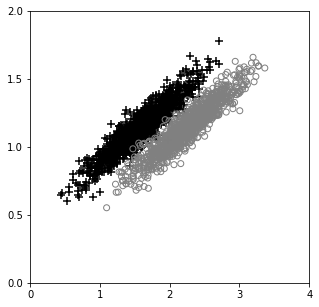

<Figure size 432x288 with 0 Axes>

In [11]:
plt.show(trainset.plot_final())

## Generate the dataset according to defined 

In [12]:
trainset.generate_dataset()
testset.generate_dataset()

In [13]:
label, image = next(iter(trainset))

In [14]:
image[0,100]

tensor([0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020,
        0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020, 0.5020,
        0.5020, 0.5020, 0.5020, 0.4941, 0.4392, 0.3020, 0.1176, 0.0235, 0.0039,
        0.0078, 0.0196, 0.0353, 0.0549, 0.0745, 0.1020, 0.1333, 0.1647, 0.2039,
        0.2392, 0.2824, 0.3255, 0.3686, 0.4157, 0.4627, 0.5098, 0.5569, 0.6000,
        0.6471, 0.6902, 0.7333, 0.7725, 0.8118, 0.8471, 0.8784, 0.9059, 0.9333,
        0.9529, 0.9725, 0.9843, 0.9922, 0.9961, 0.9961, 0.9922, 0.9843, 0.9725,
        0.9529, 0.9333, 0.9098, 0.8784, 0.8471, 0.8118, 0.7765, 0.7333, 0.6941,
        0.6471, 0.6039, 0.5569, 0.5098, 0.4627, 0.4157, 0.3725, 0.3255, 0.2824,
        0.2431, 0.2039, 0.1686, 0.1333, 0.1020, 0.0784, 0.0549, 0.0353, 0.0196,
        0.0118, 0.0039, 0.0039, 0.0039, 0.0118, 0.0235, 0.0392, 0.0588, 0.0824,
        0.1098, 0.1412, 0.1725, 0.2118, 0.2510, 0.2902, 0.3333, 0.3804, 0.4235,
        0.4706, 0.5176, 0.5647, 0.6118, 

In [15]:
type(image)

torch.Tensor

# Setting up Data Pipeline

In [16]:
batch_size = 4

In [17]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=12)

In [18]:
classes = ['Condition A', 'Condition B']

In [19]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.imshow(npimg)
    plt.show()

dataiter = iter(trainloader)
labels, images = dataiter.next()

In [20]:
images.shape

torch.Size([4, 1, 256, 256])

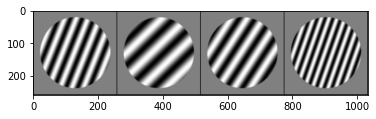

Condition A Condition A Condition A Condition B


In [21]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [22]:
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=12)
dataiter = iter(testloader)
labels, images = dataiter.next()

images.shape

torch.Size([4, 1, 256, 256])

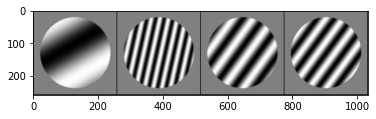

GroundTruth:  Condition A Condition A Condition A Condition A


In [23]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define a Neural Network

In [24]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 2, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 2, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(2, 2, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(2, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        #self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            #nn.Dropout(p=dropout),
            #nn.Linear(128 * 6 * 6, 16),
            
            #nn.Linear(2 * 7 * 7, 32),
            nn.Linear(2 * 7 * 7, num_classes)
            
            #nn.ReLU(inplace=True),
            #nn.Dropout(p=dropout),
            #nn.Linear(4096, 4096),
            #nn.ReLU(inplace=True),
            #nn.Linear(32, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        #print(x.shape)
        #x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [25]:
class LinearNet(nn.Module):
    def __init__(self, num_classes: int = 2, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Linear(256*256, 16, bias=True),
            nn.ReLU(),
            #nn.Linear(1024, 512),
            #nn.ReLU(),
            #nn.Linear(512,256),
            #nn.ReLU(),
            #nn.Linear(256,128),
            #nn.ReLU(),
            nn.Linear(16, num_classes)
            #nn.Linear(128, 2)
        #self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        #self.classifier = nn.Sequential(
            #nn.Dropout(p=dropout),
            #nn.Linear(128 * 6 * 6, 16),
            
            #nn.Linear(2 * 7 * 7, 32),
            #nn.Linear(2 * 7 * 7, num_classes)
            
            #nn.ReLU(inplace=True),
            #nn.Dropout(p=dropout),
            #nn.Linear(4096, 4096),
            #nn.ReLU(inplace=True),
            #nn.Linear(32, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        #x = self.features(x)
        #print(x.shape)
        #x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.features(x)
        return x

In [26]:
#net = AlexNet()
net = LinearNet()
net = net.cuda()

In [27]:
weight = [(k,v) for k,v in net.named_parameters()][2][1].data

In [28]:
weight = weight.cpu().numpy()

In [29]:
weight.shape

(2, 16)

In [30]:
weight.shape

(2, 16)

In [31]:
weight.shape[0]

2

In [32]:
def visualize_layer(model, layer_number):
    weight = [(k,v) for k,v in model.named_parameters()][layer_number][1].data.cpu().numpy()
    stacked = []
    #for dimension in range(0,weight.shape[0]):
    stacked.append(weight[0].reshape((256,-1)))
    image = np.vstack(stacked)
    plt.imshow(image)
    plt.rcParams["figure.figsize"] = (10,20)

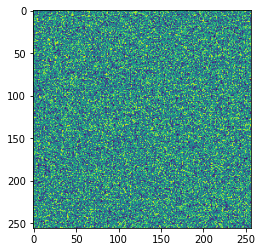

In [33]:
visualize_layer(net, 0)

In [34]:
from torchsummary import summary
summary(net, (1,256,256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]       1,048,592
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 2]              34
Total params: 1,048,626
Trainable params: 1,048,626
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.25
Forward/backward pass size (MB): 0.00
Params size (MB): 4.00
Estimated Total Size (MB): 4.25
----------------------------------------------------------------


# Define Loss Function and Optimizer

In [35]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(net.parameters(), lr=1e-3)

Epoch 1, loss: 486.422
	Test Accuracy: 96.000 %


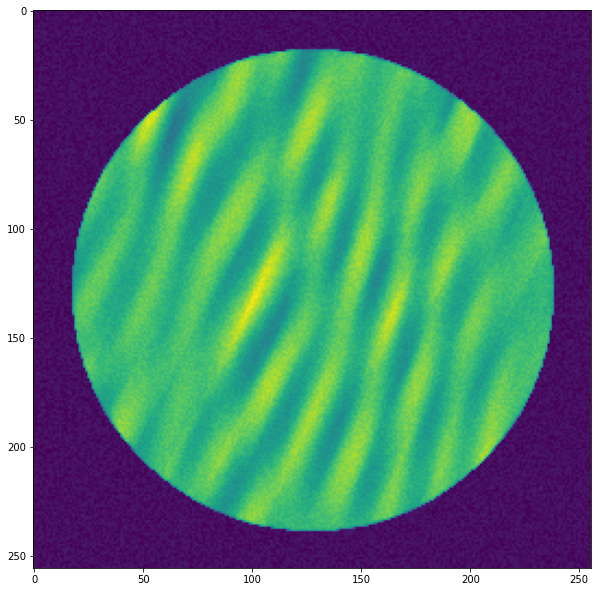

Epoch 2, loss: 78.224
	Test Accuracy: 96.500 %


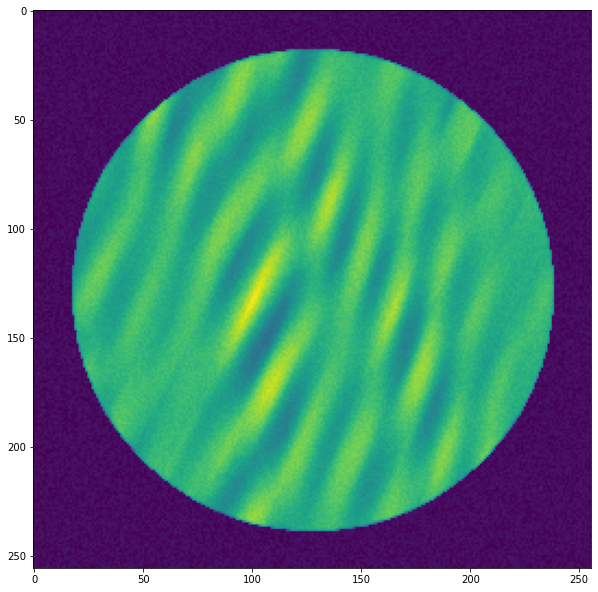

Epoch 3, loss: 57.645
	Test Accuracy: 97.000 %


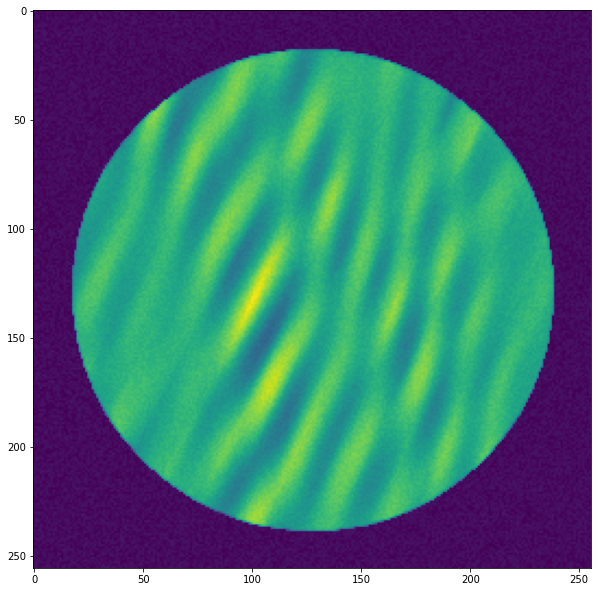

Epoch 4, loss: 65.358
	Test Accuracy: 97.000 %


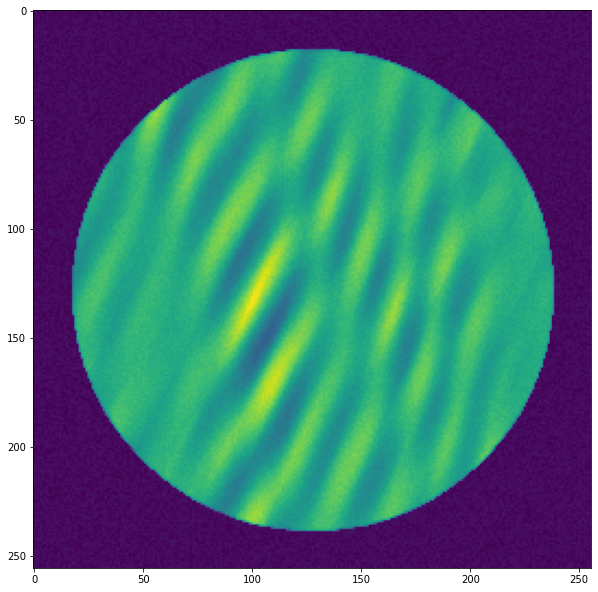

Epoch 5, loss: 51.961
	Test Accuracy: 97.000 %


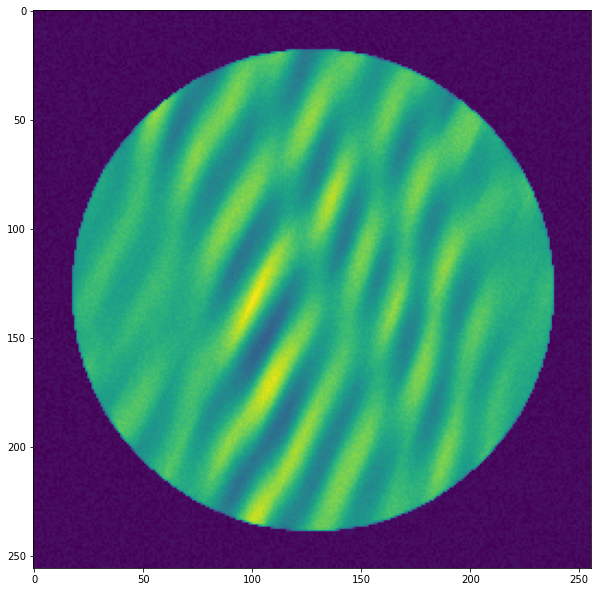

Epoch 6, loss: 39.670
	Test Accuracy: 96.000 %


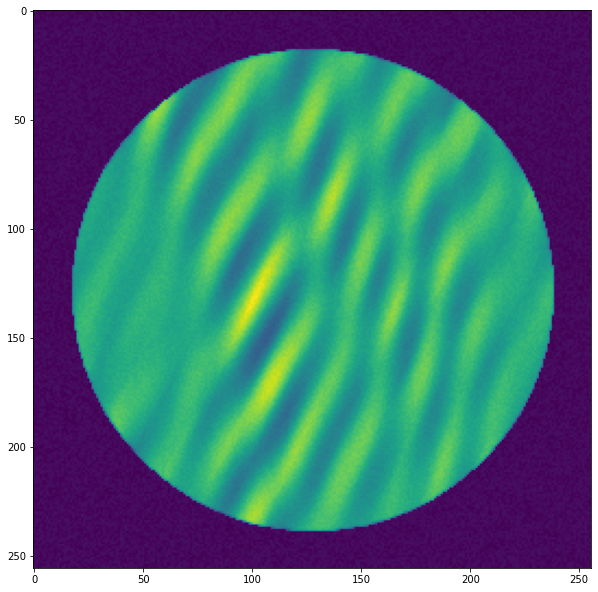

Epoch 7, loss: 34.632
	Test Accuracy: 96.000 %


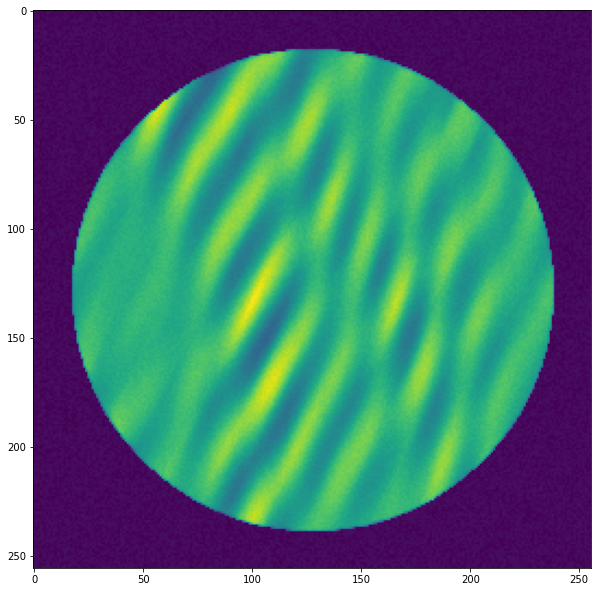

Epoch 8, loss: 48.149
	Test Accuracy: 97.500 %


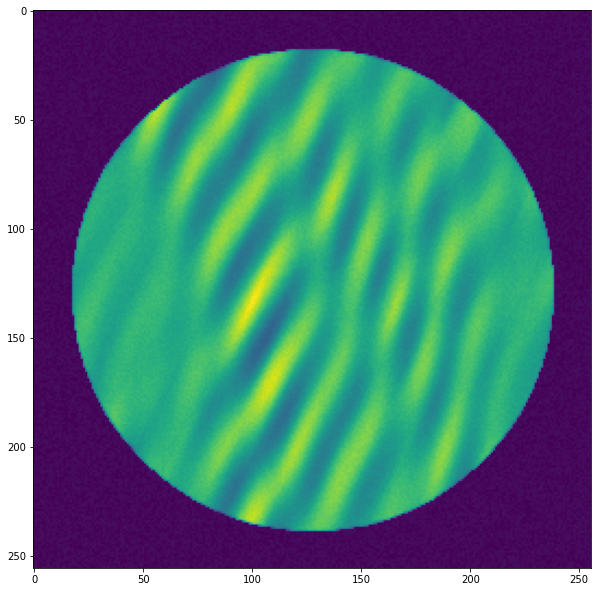

Epoch 9, loss: 76.981
	Test Accuracy: 97.500 %


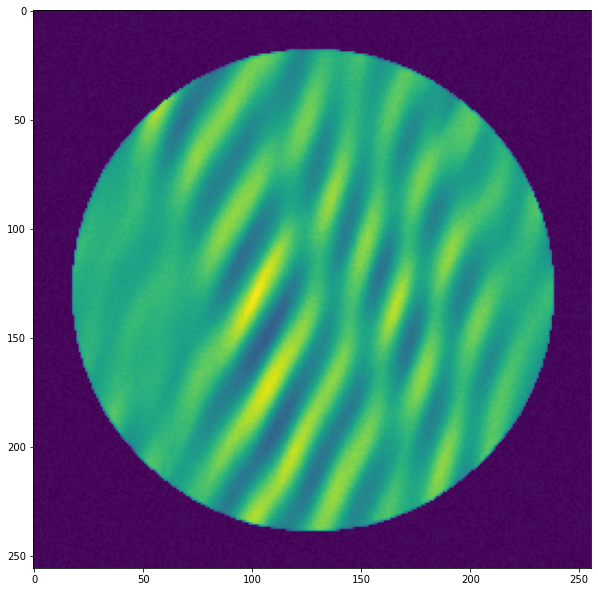

Epoch 10, loss: 58.645
	Test Accuracy: 95.500 %


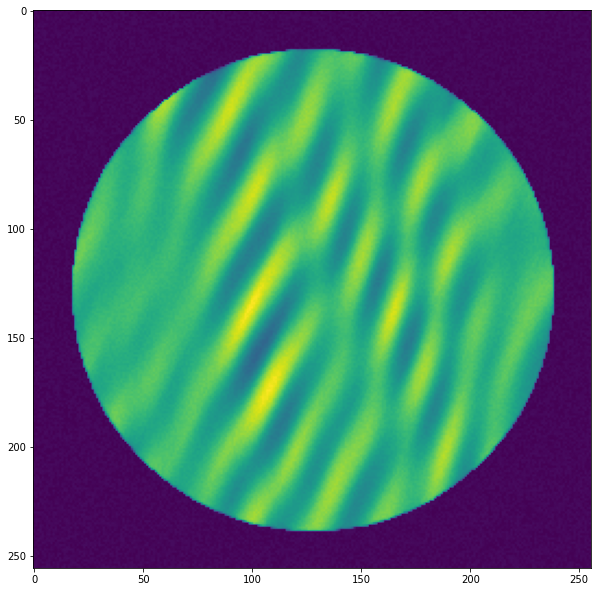

In [36]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        labels, images = data
        images = 2 * (images - 0.5002) # [0-1] to [-1,1]
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, loss: {running_loss:.3f}")
    running_loss = 0.0
    with torch.no_grad():
        correct = 0
        total = 0
        for i,data in enumerate(testloader,0):
            labels, images = data
            images = 2 * (images - 0.5002)
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)
            softmax_labels = F.log_softmax(outputs, dim=1)
            preds_classes = torch.argmax(softmax_labels, axis=-1)
            correct += int(torch.sum(preds_classes.cpu() == labels.cpu()))
            total += batch_size
        print(f"\tTest Accuracy: {100*correct/total:.3f} %")
        plt.show(visualize_layer(net, 0))


# Try: Visualizing Feature Maps for Convolutional Nets (does not work for Linear nets)

In [37]:
print(net)

LinearNet(
  (features): Sequential(
    (0): Linear(in_features=65536, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [38]:
model = net

In [39]:
model_weights = []
conv_layers = []
model_children = list(model.children())

In [40]:
# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for child in model_children[i]:
            if type(child) == nn.Conv2d:
                counter += 1
                model_weights.append(child.weight)
                conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 0


In [41]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

In [42]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0].detach().cpu().numpy()):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :], cmap='gray')
    plt.axis('off')
    #plt.savefig('../outputs/filter.png')
plt.show()

IndexError: list index out of range

<Figure size 1440x1224 with 0 Axes>

In [ ]:
dataiter = iter(testloader)
labels, images = dataiter.next()

In [ ]:
img = images[0]
img = img.unsqueeze(0)
img = img.cuda()

In [ ]:
conv_layers[0]

In [ ]:
conv_layers[0](img)

In [ ]:
conv_layers[4]

In [ ]:
results = [conv_layers[3](conv_layers[2](conv_layers[1](conv_layers[0](img)))sis comparing deep artificial neural networks and humans in sinusoidal grating categorization task.

https://sci.bban.top/pdf/10.1016/j.actpsy.2018.08.016.pdf#view=FitH)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

In [ ]:
n_outputs = []
for x in outputs:
    n_outputs.append(x.cpu())

In [ ]:
outputs = n_outputs

In [ ]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(1, 2, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    #print(f"Saving layer {num_layer} feature maps...")
    #plt.savefig(f"../outputs/layer_{num_layer}.png")
    plt.show()
    plt.close()

# Experiment Diary

Shocking finding: A single layer neural network cannot learn anything if the phase is randomized. It learns to very high accuracy if the phase is not randomized, by looking at some sort of pattern at the left edge of the circle, but this is kind of an unintended 'artifact' of the dataset generation.

I was previously racking my brain because I couldn't figure out how a single layer neural network could possibly learn the pattern. Turns out, I was not wrong.

New developmennt: a deep linear network can indeed learn, but looking at the 0th weight activation heatmap, it looks like what is actually happening is: The neural network is being trained to differentiate between the average of class A and class B examples. By average I literally mean the per-pixel average of every training image in that class.

If this is in fact what is happening, that's pretty mind-blowing. We humans couldn't possibly imagine solving this problem this way because we would never assign 67 million parameters- we only need 2! 

This would explain the fragility (seed dependence, or sudden accuracy loss) that sometimes manifests. Just image how difficult it must be to classify between two very faintly similar overlaid images.

bare AlexNet's convolution activation layer heatmap looks to quite close to the midpoint of the training data (between the two datasets). Using `demo_sinusoidal_grating` function to re-create the mid point returns roughly the same image as that shown in the heatmap.

No circular mask: Max accuracy 89.286% reached at Epoch 45
With circular mask: Max accuracy 89.286% reached at Epoch Epoch 51

Hilarious and shocking: Making the training set tiny (10) and overfittinng the training set returned the best model. Loss: 0.0, Test accuracy: 95.5%. (ii condition)

Same for 'rb' condition, but even higher accuracy: 97.0%

+ Adam lr=3e-5

This network (AlexNet-like) doesn't overfit the dataset beyond 80 training set, although maximum accuracy is reached at 160. (100%). The exact number depends on the numpy random seed (for dataset distribution).

I kept trying to weaken/lighten the neural network,
going so far as to replace Conv layers with AvgPool.
When it got stuck, I changed the seed.

Generally, lighter networks started tended to take longer to train.

ii
```
Epoch 1, loss: 85.18336582183838
Epoch 2, loss: 34.31419908697717
Epoch 3, loss: 20.531744883628562
Epoch 4, loss: 10.242627459112555
Epoch 5, loss: 8.574068777030334
Epoch 6, loss: 6.0638184630115575
Epoch 7, loss: 6.023264018360351
Epoch 8, loss: 5.1939516832790105
Epoch 9, loss: 5.4007573618218885
Epoch 10, loss: 5.164374641648465
Epoch 11, loss: 3.511080036558269
Epoch 12, loss: 4.276801145038917
Epoch 13, loss: 3.6609255538830894
Epoch 14, loss: 4.6994722907015785
Epoch 15, loss: 4.765986231519491
Epoch 16, loss: 4.714876491774248
Epoch 17, loss: 4.739646985006402
Epoch 18, loss: 3.8179756865556556
Epoch 19, loss: 3.849432604794856
Epoch 20, loss: 4.121982953985935
Epoch 21, loss: 3.3283890375539613
Epoch 22, loss: 5.158853088214528
Epoch 23, loss: 3.3509279994996177
Epoch 24, loss: 4.925103814290196
Epoch 25, loss: 3.597546736024924
Epoch 26, loss: 3.4156451058997845
Epoch 27, loss: 3.92656532269757
Epoch 28, loss: 3.454477835464786
Epoch 29, loss: 4.126161962380138
```

rb
```
Epoch 1, loss: 81.22609773278236
Epoch 2, loss: 14.698232750408351
Epoch 3, loss: 7.9504072612617165
Epoch 4, loss: 5.531502670957707
Epoch 5, loss: 2.597533548818319
Epoch 6, loss: 3.287875532914768
Epoch 7, loss: 1.6578662709071068
Epoch 8, loss: 2.9465451682626735
Epoch 9, loss: 3.038850345830724
Epoch 10, loss: 1.9624634058345691
Epoch 11, loss: 2.759255254357413
Epoch 12, loss: 2.156060866313055
Epoch 13, loss: 2.234694680584653
Epoch 14, loss: 2.082504246973258
Epoch 15, loss: 2.892491750237241
Epoch 16, loss: 2.1645498814541497
Epoch 17, loss: 2.2291575001727324
Epoch 18, loss: 1.7113196223872364
Epoch 19, loss: 1.599599110239069
Epoch 20, loss: 1.6463019263683236
Epoch 21, loss: 1.765304080741771
Epoch 22, loss: 2.0521400574434665
Epoch 23, loss: 2.256082821975724
Epoch 24, loss: 2.027793706598459
Epoch 25, loss: 1.510054058764581
Epoch 26, loss: 1.9244091983491671
Epoch 27, loss: 1.6030073140500463
Epoch 28, loss: 1.3176469673635438
Epoch 29, loss: 1.6648579663578857
```